In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({'sal':[15,17,28,10,40,50,55],'age':[28,25,30,35,35,32,40],'loan_default':[1,0,1,1,0,1,0]})
df

,sal,age,loan_default
0,15,28,1
1,17,25,0
2,28,30,1
3,10,35,1
4,40,35,0
5,50,32,1
6,55,40,0


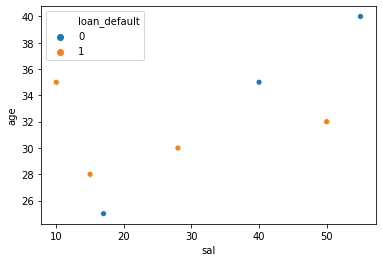

In [3]:
sns.scatterplot(x="sal", y="age", hue="loan_default",data=df)

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df=pd.read_csv("wdbc.data",names = ['id', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'])

dx = ['Benign', 'Malignant']

In [133]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Data Set Information :**
    
    The Breast Cancer (Wisconsin) Diagnosis dataset [1] contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass. Ten real-valued features are computed for each cell nucleus:
    
1.id	2.diagnosis	radius_mean	texture_mean	perimeter_mean	area_mean	smoothness_mean	compactness_mean	concavity_mean	concave points_mean	symmetry_mean	fractal_dimension_mean	radius_se	texture_se	perimeter_se	area_se	smoothness_se	compactness_se	concavity_se	concave points_se	symmetry_se	fractal_dimension_se	radius_worst	texture_worst	perimeter_worst	area_worst	smoothness_worst	compactness_worst	concavity_worst	concave points_worst	symmetry_worst	fractal_dimension_worst


    radius (mean of distances from center to points on the perimeter);
    texture (standard deviation of gray-scale values);
    perimeter;
    area;
    smoothness (local variation in radius lengths);
    compactness (perimeter^2 / area - 1.0);
    concavity (severity of concave portions of the contour);
    concave points (number of concave portions of the contour);
    symmetry;
    fractal dimension ("coastline approximation" - 1).
    The mean, standard error (SE) and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [135]:
df.drop(["id"],axis=1,inplace=True)

In [136]:
df.shape

(569, 31)

In [137]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [138]:
df['diagnosis'] =df['diagnosis'].map({'M':1, 'B':0})

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 no

In [140]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [142]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy',random_state = 0)
DT_reg=DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state = 0)
RF=RandomForestClassifier(n_estimators=10,random_state=0)

In [143]:
models=[]
models.append(('Logistic',LR))
models.append(('FGDT',DT))
models.append(('regularized_DT',DT_reg))
models.append(('Randomforest',RF))

## KFOLD

Logistic: 0.991512 (0.000043)
FGDT: 0.925109 (0.000594)
regularized_DT: 0.929676 (0.001093)
Randomforest: 0.988738 (0.000126)


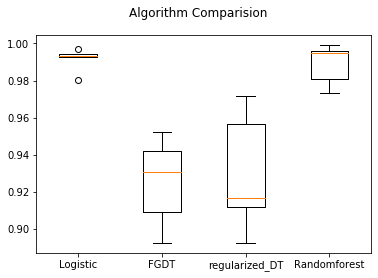

In [144]:
# evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [145]:
results

[array([0.9942839 , 0.99323362, 0.98006757, 0.99296675, 0.99700997]),
 array([0.93077167, 0.95192308, 0.89222973, 0.94181586, 0.90880399]),
 array([0.91632264, 0.97150997, 0.89222973, 0.95652174, 0.91179402]),
 array([0.99587171, 0.99501425, 0.97314189, 0.98065857, 0.99900332])]

#### re build my model for entire data set

In [146]:
DT.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [147]:
from IPython.display import Image
from sklearn import tree
from os import system

BC_Tree_File=open("bc_data.dot","w")
dot_data=tree.export_graphviz(DT,out_file=BC_Tree_File,feature_names=list(X),class_names=["Benign","Malignent"])

BC_Tree_File.close()

In [148]:
#system("dot -Tpng bc_data.dot -o BC_tree.png") #this command is to the cs
#Image("BC_tree.png")

### find Feature importance in DT

In [149]:
print(pd.DataFrame(DT.feature_importances_,columns=['imp'],index=X.columns))

                              imp
radius_mean              0.000000
texture_mean             0.000000
perimeter_mean           0.000000
area_mean                0.000000
smoothness_mean          0.000000
compactness_mean         0.000000
concavity_mean           0.005082
concave_points_mean      0.000000
symmetry_mean            0.007379
fractal_dimension_mean   0.000000
radius_se                0.000000
texture_se               0.000000
perimeter_se             0.000000
area_se                  0.017597
smoothness_se            0.000000
compactness_se           0.000000
concavity_se             0.000000
concave_points_se        0.000000
symmetry_se              0.000000
fractal_dimension_se     0.023763
radius_worst             0.011973
texture_worst            0.076738
perimeter_worst          0.685889
area_worst               0.006659
smoothness_worst         0.057138
compactness_worst        0.000000
concavity_worst          0.000000
concave_points_worst     0.077020
symmetry_worst

#### perimeter_worst          0.685889 is feature highly used is probabily split pick points